In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
bookings = pd.read_csv("INNHotelsGroup.csv")

In [3]:
bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [4]:
bookings['total_nights'] = bookings['no_of_weekend_nights'] + bookings['no_of_week_nights']

In [5]:
bookings

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,total_nights
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled,3
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled,5
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled,3
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled,2
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled,8
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled,4
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled,8
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled,3


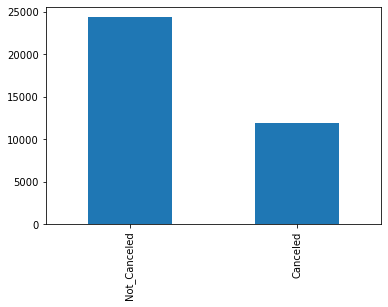

In [6]:
bookings['booking_status'].value_counts().plot.bar()
plt.show() 
#There are half Cancelled reservations as much as Non cancelled reservations.

### Visualizing missing values with seaborn

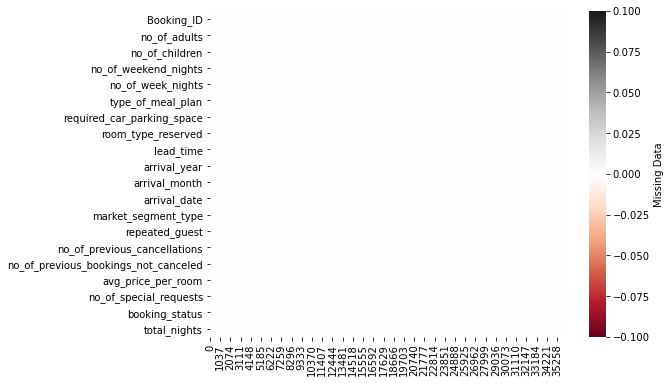

In [7]:
plt.figure(figsize=(8,6))
sns.heatmap(bookings.isna().transpose(),
            cmap="RdGy",
            cbar_kws={'label': 'Missing Data'})
plt.show()
#There are no missing values

### Month of the year which is busiest - 10(October)

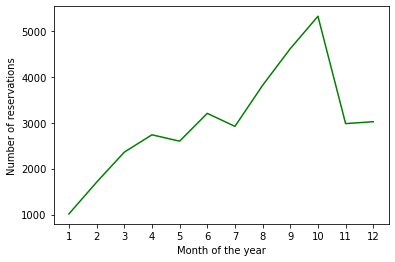

In [8]:
bookings['arrival_month'].value_counts(sort=False).plot.line(color=['green'])
plt.xticks(bookings['arrival_month'].value_counts(sort=False).index)
plt.xlabel("Month of the year")
plt.ylabel("Number of reservations")
plt.show()

### Day of the month that is busiest - 13

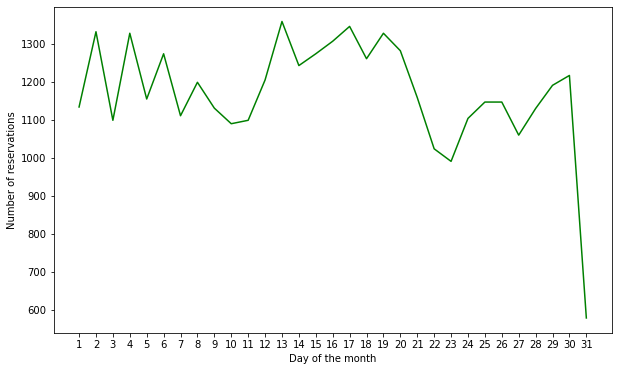

In [9]:
plt.figure(figsize=(10,6))
bookings['arrival_date'].value_counts(sort=False).plot.line(color=['green'])
plt.xticks(bookings['arrival_date'].value_counts(sort=False).index)
plt.xlabel("Day of the month")
plt.ylabel("Number of reservations")
plt.show()

### Total number of nights people stayed in the hotel

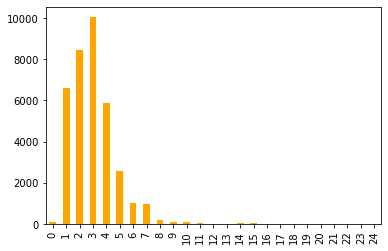

In [10]:
bookings['total_nights'].value_counts(sort=False).plot.bar(color=['orange'])
plt.show()
#most of the guests reserved to stay for 3 nights in the hotel

### Cancellations with respect to source of reservations

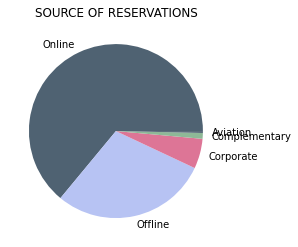

In [11]:
colors = ['#4F6272', '#B7C3F3', '#DD7596', '#8EB897']
plt.pie(bookings['market_segment_type'].value_counts().array, labels = bookings['market_segment_type'].value_counts().to_frame().index.array, colors=colors)
plt.title("SOURCE OF RESERVATIONS")
plt.show()
#This shows that online reservations are more prevalent

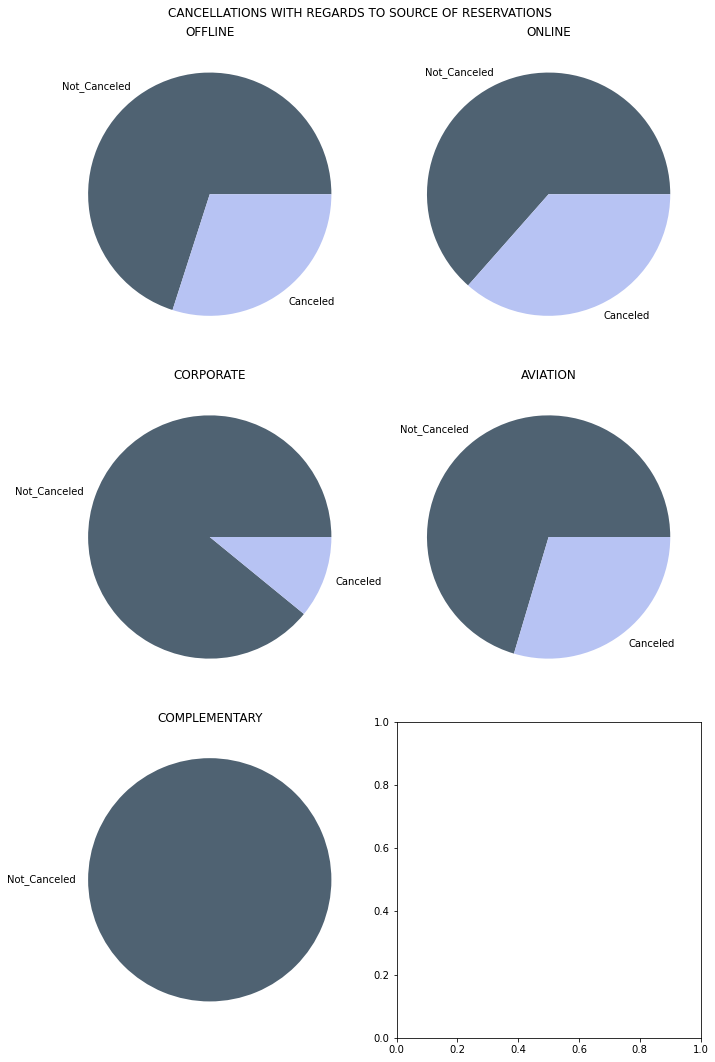

In [12]:
segments = bookings.groupby(['market_segment_type']).booking_status.value_counts()
segments_type = bookings['market_segment_type'].unique()

fig, axs = plt.subplots(3,2, figsize=(10,15))
fig.suptitle("Cancellations with regards to source of reservations".upper())
count=0
for i in range(3):
    for j in range(2):
        axs[i,j].pie(segments[segments_type[count]].values, labels=segments[segments_type[count]].index.array, colors=colors)
        axs[i,j].set_title(segments_type[count].upper())
        count+=1
        if count == 5:
            break
fig.tight_layout()
#Reservations from online and aviation have a high chance of getting canceled.

### Types of meal plans choosen

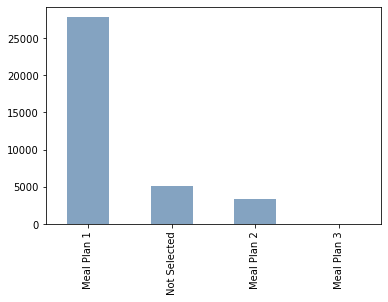

In [13]:
bookings['type_of_meal_plan'].value_counts().plot.bar(color=(0.2, 0.4, 0.6, 0.6))
plt.show()

### Cancellations vs Parking slots choosen

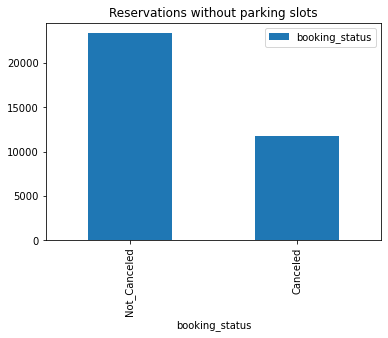

In [20]:
bookings.groupby(['required_car_parking_space']).booking_status.value_counts()[0].to_frame().plot.bar()
plt.title("Reservations without parking slots")
plt.show()

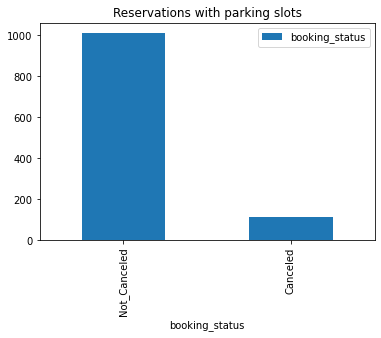

In [21]:
bookings.groupby(['required_car_parking_space']).booking_status.value_counts()[1].to_frame().plot.bar()
plt.title("Reservations with parking slots")
plt.show()

Reservations without parking slots have a higher chance of being cancelled to the ones without parking slots.